# Interest Rate Swaps - Problem Set 1 & 2

## Setup

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# local
import fixed_income_derivatives as fid

## Problem Set 1

- The year consists of 12 months each with exactly 30 days 
- All payments occur at the end of day on the last day of the month. 
- There is no credit risk
- The principal of all bonds is 100.

The date today is December 30. 2019, the last day of the year, and the BBA have just at 11 AM announced the $3 \mathrm{M}$ LIBOR fixing to be 0.01472717 and the $6 \mathrm{M}$ LIBOR fixing to be 0.01893706 . In addition, the following bonds are traded in the market.
- i) A 3 year fixed rate bullet bond maturing December 30. 2020 paying quarterly simple coupons of $4 \%$ annually and a price of 102.33689177 .
- ii) A 5 year fixed rate bullet bond maturing December 30. 2020 paying semi-annual simple coupons of $5 \%$ annually and a price of 104.80430234 .
- iii) A 10 year fixed rate bullet bond maturing June 30. 2021 paying semi-annual simple coupons of 5\% annually and a price of 105.1615306 .
- iv) An 8 year fixed rate bullet bond maturing June 30. 2021 paying quarterly simple coupons of $6 \%$ annually and a price of 105.6581905 .
- v) A 5 year fixed rate bullet bond maturing December 30. 2021 paying quarterly simple coupons of $5 \%$ annually and a price of 104.028999992 .
- vi) A 30 year fixed rate bullet bond maturing December 30. 2021 paying annual simple coupons of $3 \%$ annually and a price of 101.82604116 .

### A) Set up the cashflow matrix corresponding to this information.**

Firstly, let us setup the dimensions:
$\mathbf{C}_{N \times M}=\left[T_1, \ldots, T_m, \ldots, T_{M-1}\right]$ 
- column [time] dimension: 9
    - More specifically the m distinct future points in time are $T=\{0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2\}$
- row [asset] dimension, N: 6

In [41]:
# number of bonds and maturities
delta = 0.25
N, M = 6, 9
tau = np.array([m*delta for m in range(0,M)])
print(tau)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


Furthermore, we know from the text

In [3]:
K = 100 # principal

# LIBOR rates
L_3M = 0.01472717
L_6M = 0.01893706

# pi matrix of prices
pi = np.array([102.33689177, 104.80430234, 105.1615306,
               105.6581905 , 104.028999992, 101.82604116])

**Cookbook for Cashflow Matrix**
- Remember that the payment occurs at the end of the day of the last day of the month
- Look at maturity, not what "x" year the bond is 
- $\delta = 1/m$, where m is frequency per year
- coupons are fixed at predetermined size $c = \delta R K $
- Price is irrelevant for CF
- Entire principal is repaid at time $T_M$

In [4]:
C = np.zeros([N,M]) # initialize

C[0,:] = [0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25+K,0,0,0,0]  # bond 1
C[1,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0,0,0] # bond 2
C[2,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0] # bond 3
C[3,:] = [0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25+K,0,0] # bond 4
C[4,:] = [0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25+K] # bond 5
C[5,:] = [0.03*K*1,0,0,0,0.03*K*1,0,0,0,0.03*K*1+K] # bond 6 
print(f"Rank of matrix: {np.linalg.matrix_rank(C)}")

Rank of matrix: 6


In [5]:
print(C)

[[  1.     1.     1.     1.   101.     0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.   102.5    0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.     2.5    0.   102.5    0.     0.  ]
 [  1.5    1.5    1.5    1.5    1.5    1.5  101.5    0.     0.  ]
 [  1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25 101.25]
 [  3.     0.     0.     0.     3.     0.     0.     0.   103.  ]]


### B) Find the Vector of Zerop Coupon Prices and Term Structure.**

Following the first fundamenteal theorem of asset pricing we must find a price vector of zero coupoun bonds such that
$$\pi = c d \Rightarrow \pi = c p^{\text{ZCB}} \Leftrightarrow p^{\text{ZCB}} = \pi c^{-1}$$

The problem however is that we need market completeness, i.e. we need that the Cash flow matrix has rank of $M$, however it $\text{rank}(N) < M$.

**How to get $\text{rank}(N) = M$**

Now using the simple compounding formula
$L(t, T)=-\frac{p(t, T)-1}{(T-t) p(t, T)} = \frac{1-p(t, T)}{(T-t) p(t, T)} $ we can derive the price of ZCB in 3M and 6M from the information on LIBOR. This follows from the following derivation: 
We multiply both sides by $(T-t) p(t, T)$:
$$
L(t, T)(T-t) p(t, T)=1-p(t, T)
$$
Next, we add $p(t, T)$ to both sides to start isolating $p(t, T)$:
$$
L(t, T)(T-t) p(t, T)+p(t, T)=1
$$
Next, we can factor out $p(t, T)$ from the left side:
$$
p(t, T)[L(t, T)(T-t)+1]=1
$$
Now we can solve for $p(t, T)$ :
$$
p(t, T)=\frac{1}{L(t, T)(T-t)+1}  (*)
$$

In [6]:
p = np.ones([M]) # initialize spot price vector

p[1], p[2] = 1/(1+tau[1]*L_3M) , 1/(1+tau[2]*L_6M) # using (*) formula above
print(f'p_1 is {p[1]} and p_2 is {p[2]}.')

p_1 is 0.9963317133702015 and p_2 is 0.9906202821399495.


Say we take the first bond
$$
\begin{aligned}
& \pi_1 \\
& =p(0,0) * c_0+p(0,0.25) * c_{0.25}+p(0,0.5) \\
& * c_{0.5}+p(0,0.75) * c_{0.75} \ldots+p(0,2) * c_2
\end{aligned}
$$

The problem is to find the vector p, we need to find the inverse of C. However, we do not have a quadratic matrix. But notice, we can move $c_0$, $c_{0.25}$ and $c_{0.5}$ to the other side since we have computed them above.  

In [7]:
p[2]

0.9906202821399495

In [8]:
y = pi - p[0]*C[:,0]-p[1]*C[:,1]-p[2]*C[:,2]

In [9]:
# unknown know becomes
x = C[:,3:]

Now we can solve for vector of zero coupon prices, $p$

In [10]:
p[3:] = np.linalg.solve(x,y)
p

array([1.        , 0.99633171, 0.99062028, 0.98308207, 0.97392928,
       0.96383257, 0.95366007, 0.94189432, 0.93110926])

**Term Structure**

Next, we can solve for the term structure (i.e. the yield curve). The term structure of interest rates at time $t$ for maturities $T_1, T_2, \ldots, T_M$ consists of the collection of continuously compounded annualized zero coupon spot rates $R\left(t, T_1\right), R\left(t, T_2\right), \ldots, R\left(t, T_M\right)$. Thus, we use defintion 19.9 of continuously compounded zero coupon yield  in Björk to find $y(t,T) = -\frac{\log p(t,T) }{T-t}$, also known as the (zero coupon) yield curve.

In [11]:
r = fid.zcb_to_spot_rates(tau,p)
r

array([0.        , 0.01470013, 0.01884797, 0.02275024, 0.02641658,
       0.02947014, 0.031632  , 0.03420697, 0.03568933])

### C) Find 3M Forward Rates

To find the the 3M forward rates, I use continuously compounded forwards rate for [S,T] contracted at t is defined as $\quad R(t ; S, T)=-\frac{\log p(t, T)-\log p(t, S)}{(T-S)}$

In [12]:
f_3M = fid.zcb_to_forward_rates(tau,p,horizon=1)
f_3M

array([0.        , 0.01470013, 0.02299581, 0.03055477, 0.03741562,
       0.04168438, 0.04244128, 0.04965681, 0.04606583])

In [13]:
print(f'Spot rates are {r}')
print(f'and forward rates are {f_3M}')

Spot rates are [0.         0.01470013 0.01884797 0.02275024 0.02641658 0.02947014
 0.031632   0.03420697 0.03568933]
and forward rates are [0.         0.01470013 0.02299581 0.03055477 0.03741562 0.04168438
 0.04244128 0.04965681 0.04606583]


### D) Find the price of a 2 year floating rate bullet note with principal 100 paying $6 \mathrm{M}$ LIBOR Issued Today 

If $t=T_0$ then $p(T_0)=1$ and thus $\pi(t)=K$. 
Meaning the spot starting Floating-Rate note (FRN) must trade at par, because we accrue interest at exact same rate as we discount with. Thus, we are indifferent between receiving K dollars today or in the future. This stems from a replicating strategy argument.

In [14]:
pi_float = K*p[0]
pi_float

100.0

### E) Find the par swap rate for a 2-year interest rate swap paying semi-annual fixed coupons at annual rate $R$ to the 'receiver' and quarterly 3M LIBOR to the 'payer' issued today.

Following proposition 19.8 and in the case that initial value $T_0 = 0$ the formula reduces to this (i.e. the par swap rate)
$R=\frac{1-p\left(0, T_N\right)}{\delta \sum_{i=1}^{i=N} p\left(0, T_i\right)}$. 
- $p\left(0, T_8\right)$ is the discount factor at the final maturity of the swap
- the sum in the denominator aggregates the present values of all the individual payment periods to find the total present value of the fixed leg payments of the swap.

Here we have the timeline for fixed payments to occur semi-annually, which means every 0.5 years over a period of 2 years. This gives rise to payment times at $T_2, T_4, T_6$, and $T_8$ in your defined time grid. Correspondingly, $\delta=0.5$.

In [15]:
T_n = 0 
T_N = 2 

S_swap = fid.zcb_to_accrual_factor(T_n,T_N,'semiannual',tau,p)
R_swap = fid.zcb_to_par_swap_rate(T_n,T_N,'semiannual',tau,p)
print(f'S_swap is {S_swap} and R_swap is {R_swap}')

S_swap is 1.9246594435005713 and R_swap is 0.03579373214423337


### F) Compare the par swap rate to the forward rates in C)

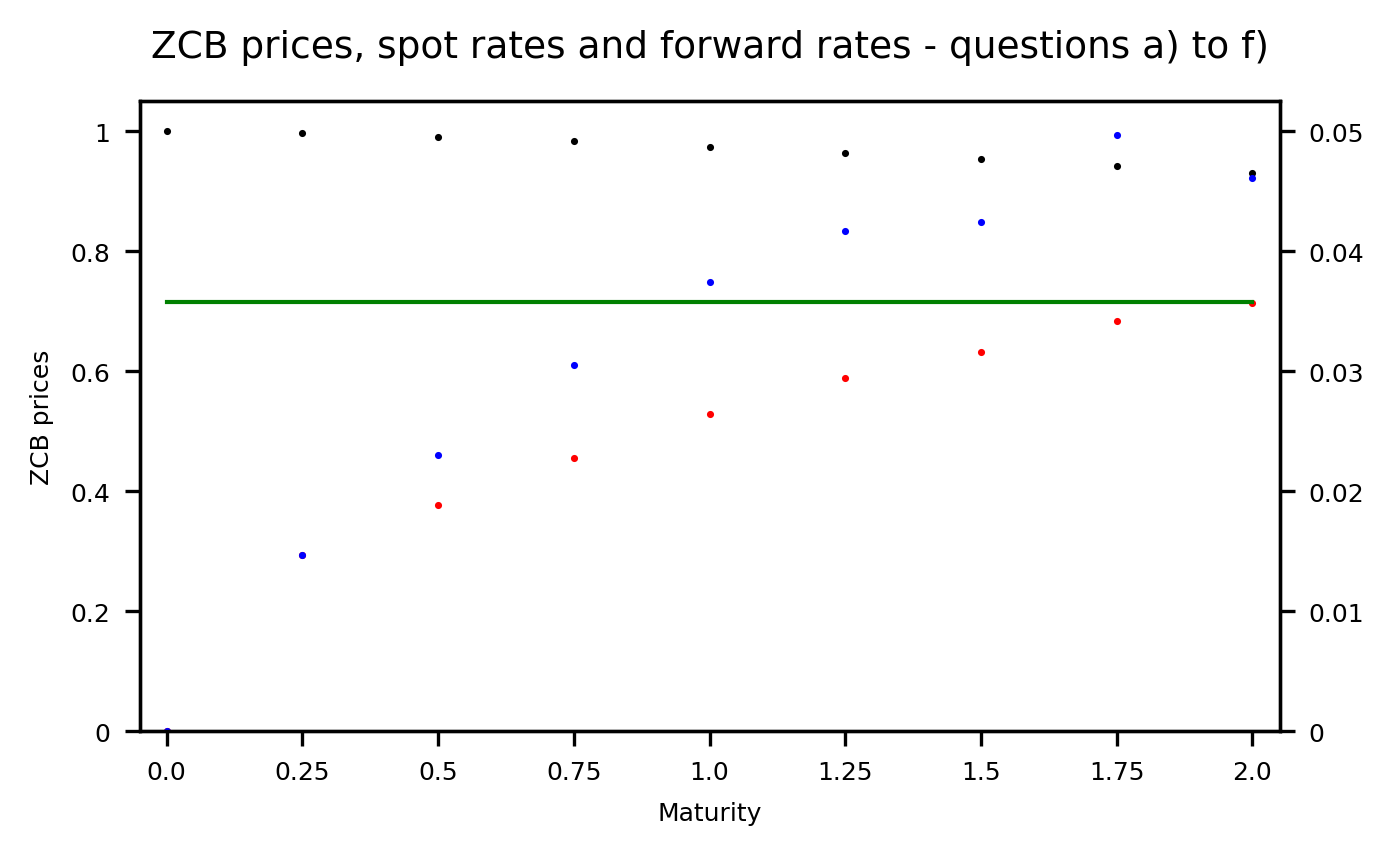

In [16]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5, 3))
fig.suptitle("ZCB prices, spot rates and forward rates - questions a) to f)", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax.set_xticks(tau)
ax.set_xticklabels(tau, fontsize=6)
ax.set_xlim([tau[0] - 0.05, tau[-1] + 0.05])
plt.xlabel("Maturity", fontsize=6)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=6)
ax.set_ylim([0, 1.05])
ax.set_ylabel("ZCB prices", fontsize=6)
ax.scatter(tau, p, s=2, color='black', marker=".")

ax1 = ax.twinx()
ax1.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])
ax1.set_yticklabels([0, 0.01, 0.02, 0.03, 0.04, 0.05], fontsize=6)
ax1.set_ylim([0, 0.0525])
ax1.scatter(tau, r, s=2, color='red', marker=".")
ax1.scatter(tau, f_3M, s=2, color='blue', marker=".")
ax1.plot(tau, R_swap * np.ones([M]), color='green', linewidth=1, marker="");

This average is front-loaded meaning that the weights applied to first forwards are larger than the weights applied to the last forwards because of discounting (early payments are worth more due to time-value-of-money). This makes sense as we must on average expect to pay and receive the same in interest. 

### G) Set up system of equations (more unknowns) & include interest rate swap

Time now passes and the date becomes January 30. 2020. From a good friend you now know that the price of zero coupon bond maturing on March 30. 2020 is 0.99699147 and that the price of a zero coupon bond maturing on June 30. 2020 is 0.99088748. Because of market fluctuations, the prices of the bonds i)-vi) are now $[101.98667646,102.96333877,102.68122237,104.17312216,102.76231402,98.8174065]$ and the price of the receiver swap from e) is now 0.02515099.

In [17]:
# We update our setup according to the information 

# move 1 month into the future
tau_new = np.zeros([M]) 
tau_new[1:] = tau[1:] - 1/12 

# pi matrix of the new prices 
pi_new = np.array([101.98667646, 102.96333877, 102.68122237,
                    104.17312216, 102.76231402, 98.8174065])

pi_swap_new = 0.02515099
p_0_2M_new = 0.99699147
p_0_5M_new = 0.99088748

# initialize new cash flow matrix
C_new = np.zeros([N,M]) 
C_new[:,1:] = C[:,1:]

In [18]:
print(C_new)

[[  0.     1.     1.     1.   101.     0.     0.     0.     0.  ]
 [  0.     0.     2.5    0.   102.5    0.     0.     0.     0.  ]
 [  0.     0.     2.5    0.     2.5    0.   102.5    0.     0.  ]
 [  0.     1.5    1.5    1.5    1.5    1.5  101.5    0.     0.  ]
 [  0.     1.25   1.25   1.25   1.25   1.25   1.25   1.25 101.25]
 [  0.     0.     0.     0.     3.     0.     0.     0.   103.  ]]


In [19]:
# receiver swap (i.e. the one who receives the fixed coupon payments)
C_swap = np.array([0, -K*(0.25*L_3M+1), 0.5*R_swap*K, 0, 0.5*R_swap*K, 0, 0.5*R_swap*K, 0, 0.5*R_swap*K+K])
print(C_swap)

[   0.         -100.36817925    1.78968661    0.            1.78968661
    0.            1.78968661    0.          101.78968661]


We have to incorporate the price of the interest rate swap into our system of equations.
- index 0: It is 0 because, at the time of initiation of the swap (time $T_0$ ), there are no cash exchanges.
- index 1: This term signifies the first payment in the floating leg of the swap. The amount is being paid, hence the negative sign. The payment involves both the interest payment calculated using 3-month LIBOR -( $0.25 \cdot K \cdot L_{3 M}$ ) and the principal amount $(-K)$.
- index 2: the net cash flow at the second payment date, where only the fixed leg makes a payment equal to $0.5 \times R \times K$, with $R$ being the fixed rate decided at the inception of the swap, and 0.5 representing a semi-annual payment.
- index 3 to 8: These entries alternate between 0 and $0.5 \times R \times K$, representing the periodic payments from the fixed leg, which happen every 6 months, hence the repeated pattern.
- index 8: This term represents the net cash flow at the final payment date. The fixed leg makes a payment equal to $0.5 \times R \times K$ (the regular semi-annual payment) plus $K$ (the final return of the notional amount at the end of the swap contract).

In [20]:
C_new = np.vstack([C_new,C_swap])

### H) Solve this system of equations to find zero coupon bond prices, zero coupon bond rates and $3 \mathrm{M}$ forward rates

Hint: If $\mathbf{C}$ is an $N \times M$ matrix with $N>M$ and has full rank $M$, then the rank of $\mathbf{C}^{\prime} \mathbf{C}$ will also be $M$ because for real matrices it holds that $\operatorname{rank}(C)=\operatorname{rank}\left(C C^T\right)=\operatorname{rank}\left(C^T C\right)$.

In [21]:
p_new = np.ones([M])
p_new[1], p_new[2] = p_0_2M_new, p_0_5M_new # from the text

y = np.hstack([pi_new,pi_swap_new]) - p_new[1]*C_new[:,1] - p_new[2]*C_new[:,2] # using new interest swap rates

x = C_new[:,3:]
p_new[3:] = np.linalg.solve(np.matmul(np.transpose(x),x),np.matmul(np.transpose(x),y))

In [22]:
p_new

array([1.        , 0.99699147, 0.99088748, 0.98383962, 0.98034612,
       0.96309391, 0.95369837, 0.90104461, 0.9313574 ])

In [23]:
r_new, f_3M_new = np.zeros([M]), np.zeros([M])

r_new = fid.zcb_to_spot_rates(tau_new,p_new)
f_3M_new = fid.zcb_to_forward_rates(tau_new,p_new,horizon=1)

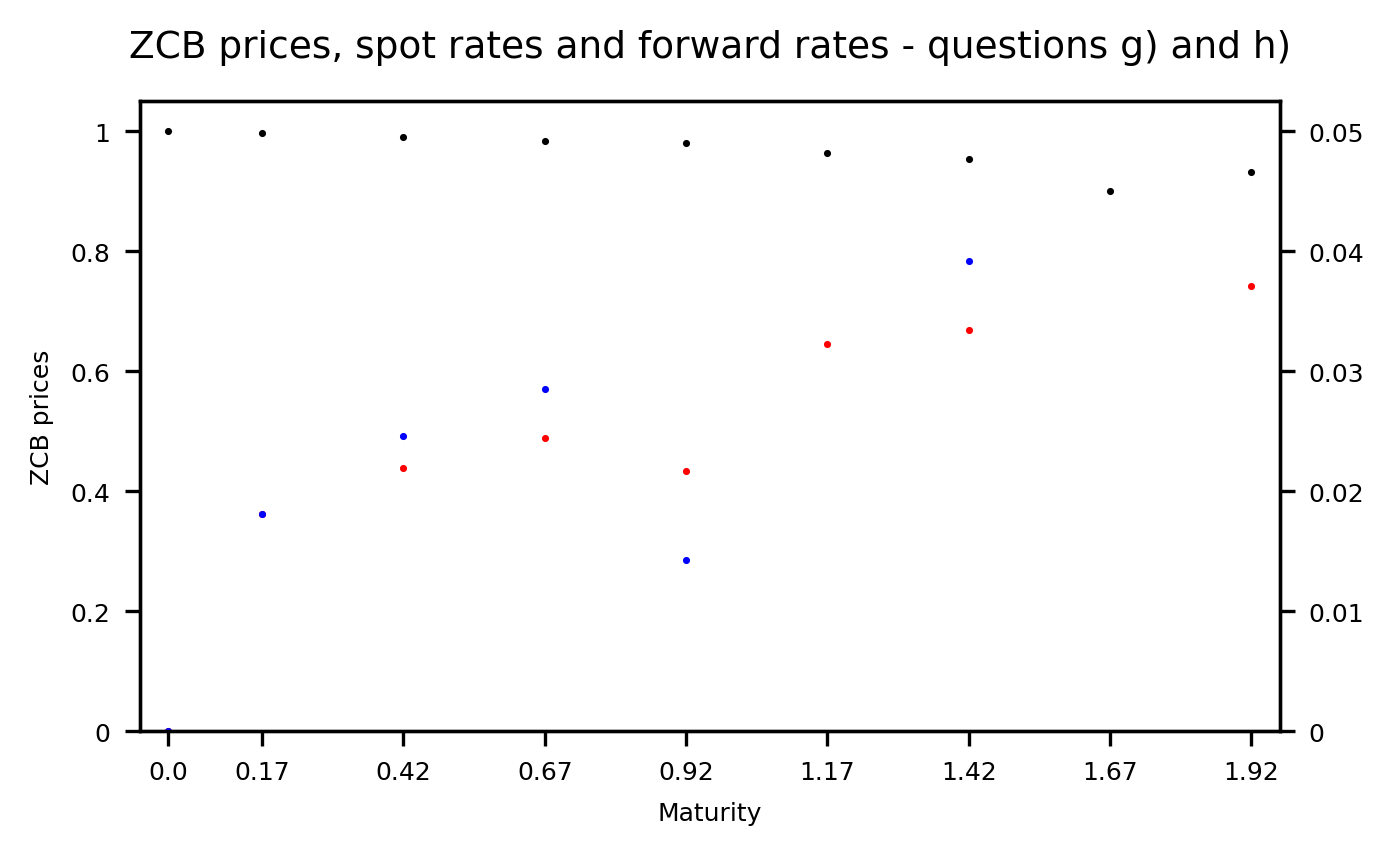

In [24]:
fig2 = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig2.suptitle("ZCB prices, spot rates and forward rates - questions g) and h)", fontsize=9)

gs = fig2.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig2.add_subplot(gs[0,0])

xtick_labels = [round(tau_new[i],2) for i in range(len(tau_new))]
ax.set_xticks(tau_new)
ax.set_xticklabels(xtick_labels, fontsize=6)
ax.set_xlim([tau_new[0]-0.05, tau_new[-1]+0.05])

plt.xlabel("Maturity", fontsize=6)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=6)
ax.set_ylim([0, 1.05])
ax.set_ylabel("ZCB prices", fontsize=6)

ax.scatter(tau_new, p_new, s=2, color='black', marker=".")
ax1 = ax.twinx()

ax1.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])
ax1.set_yticklabels(["0", "0.01", "0.02", "0.03", "0.04", "0.05"], fontsize=6)  # Fixed the list to contain string values
ax1.set_ylim([0, 0.0525])

ax1.scatter(tau_new, r_new, s=2, color='red', marker=".")
ax1.scatter(tau_new, f_3M_new, s=2, color='blue', marker=".")
plt.show()

## Problem Set 2

- year consists of 12 months each with exactly 30 days and that all payments occur at the end of day on the last day of the quarter. 
- assume that there is no credit risk
- the principal of all bonds is 100
- all interest rates are annualized. 
- The date today is January 15th 2017 but you know the LIBOR fixings from December 30. 2016 and they were $3 M$ LIBOR: 5.2\%,6M LIBOR: $4.9 \%, 12 \mathrm{M}$ LIBOR: $4.76 \%$.

The following three **interest rates swaps** are available in the market
- A receiver swap with maturity December 30. 2017 receiving fixed semi-annual coupons of $5.1 \%$ and paying floating quarterly $3 \mathrm{M}$ LIBOR trading for 0.79492002. 
- A payer swap with maturity December 30. 2018 paying fixed annual coupons of $4.4 \%$ and receiving floating semi-annual $6 \mathrm{M}$ LIBOR trading for -1.02540877. 
- A receiver swap with maturity December 30. 2018 receiving fixed annual coupons of $4.9 \%$ and paying floating quarterly 3M LIBOR trading for 2.05066409.

In addition to the three interest rate swaps, there are also five fixed rate bullet bonds in the market.
- A fixed rate bullet bond maturing December 30. 2017 paying quarterly simple coupons of $7 \%$ and a price of 103.02163487.
- A fixed rate bullet bond maturing June 30. 2018 paying semi-annual simple coupons of $5 \%$ and a price of 101.80152680.
- A fixed rate bullet bond maturing December 30. 2018 paying annual simple coupons of $6 \%$ and a price of 104.48120266.
- A fixed rate bullet bond maturing June 30. 2018 paying quarterly simple coupons of $4.5 \%$ and a price of 101.10990798.
- A fixed rate bullet bond maturing December 30. 2018 paying quarterly simple coupons of $5.5 \%$ and a price of 103.67216735.

### A) Set up equations for the value of both the fixed- and floating legs in terms of the LIBOR fixings and zero coupon bond prices for the three interest rate swaps.

In [25]:
tau

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [26]:
# number of bonds and maturities
N, M = 8, 9 
tau = np.array([0,5/24,11/24,17/24,23/24,29/24,35/24,41/24,47/24]) # due to start in january

K = 100 # principal

# LIBOR rates
L_3M = 0.052
L_6M = 0.049

R_swap_1 = 0.051
R_swap_2 = 0.044
R_swap_3 = 0.049

# pi matrix of prices
pi = np.array([0.79492002,-1.02540877,2.05066409,103.02163487,101.80152680,104.48120266,101.10990798,103.67216735])

### B) Construct a cashflow matrix $\mathbf{C}$ with each row corresponding to a traded assets. What is the rank of this matrix? For which maturities can you compute zcb prices?

In [27]:
C = np.zeros([N,M]) # initialize

C[0,:] = [0,-K*(0.25*L_3M+1),0.5*K*R_swap_1,0,0.5*K*R_swap_1+K,0,0,0,0]  # receiver swap 1, we don't know L
C[1,:] = [0,0,K*(0.5*L_6M+1),0,-1*K*R_swap_2,0,0,0,-1*K*R_swap_2-K] # payer swap 1
C[2,:] = [0,-K*(0.25*L_3M+1),0,0,1*K*R_swap_3,0,0,0,1*K*R_swap_3+K] # receiver swap 2
C[3,:] = [0,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07+K,0,0,0,0] # bond 1
C[4,:] = [0,0,0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0] # bond 2
C[5,:] = [0,0,0,0,1*K*0.06,0,0,0,1*K*0.06+K] # bond 3 
C[6,:] = [0,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045+K,0,0] # bond 4 
C[7,:] = [0,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055+K] # bond 5

print(f"Rank of matrix: {np.linalg.matrix_rank(C)}")

Rank of matrix: 8


$$
\begin{aligned}
& \Pi(\text { receiver })=\pi(\text { fixed legs })-\pi(\text { floating legs })=\sum_{i=1}^n \delta R K p\left(t, T_i\right)+p\left(t, T_n\right) K= \\
& p\left(t, T_1\right) L_{-} 3 M\left(T_{0-\frac{1}{24}}, T_{\frac{5}{24}}\right)+K p\left(t, T_{\frac{5}{24}}\right)
\end{aligned}
$$

From this we can construct $\Pi_{8 x 1}=C_{8 x 9} * d_{9 x 1}=c_{8 x 9} * p_{9 x 1}$
Here the ninth time point is right now, allowing us to plot the ZCB prices, including right now.
$$
\Pi-C[:, 0] * P[0]=C[:, 1:]_{8 \times 8} * p[1:]_{8 \times 1}
$$

Always makes sure that cash flow has full rank! If there is less than full rank you will not be able to solve it.

### C) Compute ZCB prices for as many maturities as you can. Is the market complete? Is it arbitrage free?

In [28]:
p = np.ones([M])
y = pi - C[:,0]
x = C[:,1:]
p[1:] = np.linalg.solve(x,y)
print(f'ZCB prices {p}')

ZCB prices [1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


The market is complete since there is full rank. 
It means that we can replicate any stream of cash flow in the future that you please.

Now all price entries have to be positive in the vector of zcb for there to be no arbitrage


### D) Compute Spot and Forward Rates

In [29]:
r, f_3M = np.zeros([M]), np.zeros([M])

r = fid.zcb_to_spot_rates(tau,p)
f_3M = fid.zcb_to_forward_rates(tau,p,horizon=1)
print(f"ZCB spot rates: {r}")
print(f"3M forward rates: {f_3M}")

ZCB spot rates: [0.         0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]
3M forward rates: [0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


### E) What would the prices of the 8 bonds be if all spot rates were to suddenly drop by 10 basispoints ( 0.1 percentage points)?

**Risk management**:

An immidiate push to the yield curve relates to duration, 
So you construct new spot rate matrix --> compute new zbc --> compute new instrument prices. 
Since spot rates went down prices will also go down --> so the receiver will have made money!

In [30]:
r_new

array([0.        , 0.01807839, 0.0219703 , 0.02443858, 0.0216541 ,
       0.0322323 , 0.03346435, 0.06252031, 0.03710201])

In [31]:
r_new, p_new = fid.spot_rate_bump(tau,-0.001,tau,r,p)
print(f"New spot rates: {r_new}")
print(f"New ZCB prices: {p_new}")

New spot rates: [-0.001       0.04431828  0.04251833  0.04092989  0.03952809  0.03829101
  0.03719928  0.03623584  0.03538561]
New ZCB prices: [1.         0.99080952 0.98070109 0.97142423 0.96282743 0.95478576
 0.94719627 0.93997416 0.9330497 ]


In [32]:
pi_new = np.matmul(C,p_new)
print(f"New bond prices: {pi_new}")

New bond prices: [  0.86973647  -1.1740026    2.22576323 103.11782696 101.94643885
 104.68023231 101.25333922 103.86602576]


### F) For swap i) what would the fixed rate have had to be for the swap to trade at par?

One would have to make the R smaller cf. The equations

In [33]:
T_n = 0 
T_N = 1

S_swap_1_new = fid.zcb_to_accrual_factor(T_n,T_N,'semiannual',tau,p_new)
R_swap_1_new = fid.zcb_to_par_swap_rate(T_n,T_N,'quarterly',tau,p_new)
print(f'S_swap is {S_swap} and R_swap if issued today is {R_swap}')

S_swap is 1.9246594435005713 and R_swap if issued today is 0.03579373214423337


/Users/hanschristian/Documents/GitHub/Fixed-Income-Derivatives/fixed_income_derivatives.py:83: RuntimeWarning: divide by zero encountered in divide
  R = D/S
/Users/hanschristian/Documents/GitHub/Fixed-Income-Derivatives/fixed_income_derivatives.py:83: RuntimeWarning: invalid value encountered in divide
  R = D/S


### G) Has the owner of the receiver swap i) made a profit assuming he bought at the day of issuance? Could your conclusion have been reached already from the answer to f)?

In [34]:
# Problem g)
R_trader = 0.052
C_trader = [0,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader,0,0.5*K*R_trader+K]
pi_trader = np.matmul(C_trader,p)
print(f"C_trader: {C_trader}, pi_trader: {pi_trader}")

C_trader: [0, 0, 2.6, 0, 2.6, 0, 2.6, 0, 102.6], pi_trader: 103.0523385081963


### H) Now a trader calls you and offers to sell you a fixed rate bullet bond with semi-annual coupons of $5.2 \%$ maturing on December 30. 2018 for 100.2. Show that the inclusion of this bond into the market gives rise to an arbitrage?

we now have more assets than states which can give rise to arbitrage. We should buy bond for 102 because it is worth 103 in the market which we can do via replicating (self-financing) portfolio. 

$\begin{aligned} & h_{1 x 8}^{\prime} * C_{8 x 9}=[\text { future cash flow from } \mathrm{h}]=\mathrm{a}_{1 x 9} \\ & h^{\prime} *([:, 1:]=a[1:]), a^{\prime}{ }_{8 x 1}=c^{\prime}{ }_{9 x 8} h_{8 x 1}, h=\left(c^{\prime}\right)^{-1} a^{\prime}\end{aligned}$

In [35]:
y = np.transpose(C_trader[1:])
x = np.transpose(C[:,1:])
h_rep = np.linalg.solve(x,y)
pi_rep = np.matmul(h_rep,pi)
print(f"arbitrage portfolio: {h_rep}")
print(f"arbitrage portfolio cashflow check: {np.matmul(h_rep,C)-C_trader}")
print(f"pi_rep: {pi_rep}")

C_zcb_3M = np.zeros([M])
C_zcb_3M[1] = 1
y = np.transpose(C_zcb_3M[1:])
h_zcb_3M = np.linalg.solve(x,y)
C_zcb_3M = np.matmul(np.transpose(h_zcb_3M),C)
pi_zcb_3M = np.matmul(h_zcb_3M,pi)
print(f"Portfolio replicating zcb_3M: {h_zcb_3M}")
print(f"Cashflow h_zcb_3M: {C_zcb_3M}")
print(f"Price h_zcb_3M: {pi_zcb_3M}")

arbitrage portfolio: [-3.19490967e-02  2.55544711e-02  3.19490967e-02 -1.02549702e-17
  2.53658537e-02  9.61475722e-01  0.00000000e+00  0.00000000e+00]
arbitrage portfolio cashflow check: [ 0.00000000e+00 -5.69106026e-15 -7.99360578e-15 -1.79461978e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
pi_rep: 103.0523385081963
Portfolio replicating zcb_3M: [-9.89296736e-05  2.46237841e-06 -9.77273864e-03  0.00000000e+00
  0.00000000e+00  9.67374864e-03  0.00000000e+00  0.00000000e+00]
Cashflow h_zcb_3M: [0.00000000e+00 1.00000000e+00 1.81820704e-16 0.00000000e+00
 6.93889390e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Price h_zcb_3M: 0.9906031214634189


### I) construct an Arbitrage type 1 and an Arbitrage type II. Which one is better or are they equally good?

The difference is really just whether you want positive cash flow now and no negative in the future (shorting), and something that gives you nothing today and with certain cash flow in the future.